## Анализ полученных данных

Статистика по вакансиям для удобного отображения вынесена в отдельную тетрадку.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

from scipy.sparse import hstack
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sns.set()

### Загрузка данных

In [2]:
df = pd.read_csv('../../hh_results.csv')
df[df['Salary']][0:7]

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
9,119690724,Разработчик Java,Удобный Софт,True,120000.0,NaN,От 1 года до 3 лет,Удаленная работа,"['Git', 'Java', 'Spring Framework', 'ООП', 'SQL']","Обязанности: Разработка нового функционала, И..."
10,119827529,Middle python-разработчик,Смарт Аналитикс Рус,True,NaN,217500.0,От 1 года до 3 лет,Полный день,[],"Мы ищем опытного Middle Python разработчика, к..."
20,119692590,Разработчик баз данных,JFoRecruitment,True,261000.0,348000.0,От 3 до 6 лет,Полный день,"['PostgreSQL', 'MS SQL Server', 'SQL']","О компании Для нашего клиента, одного из ведущ..."
22,119903671,Python-разработчик,Sofit,True,156600.0,NaN,От 1 года до 3 лет,Удаленная работа,"['SQLAlchemy', 'PostgreSQL', 'REST API', 'Pyth...",Мы ищем талантливого и увлеченного Python-разр...
24,119479827,"Frontend-разработчик в Only (Next.js, React)",Онли,True,140000.0,NaN,От 3 до 6 лет,Полный день,"['HTML', 'CSS', 'React', 'TypeScript', 'Git', ...",Кого ищем? Ищем в команду Only Middle Frontend...
25,119768752,Java Backend Developer,ЮНИС Лабс Решение,True,180000.0,NaN,От 3 до 6 лет,Удаленная работа,"['Java 11', 'Apache Maven', 'PostgreSQL', 'Rab...",Вас привлекает мир высоких технологий и вы хот...
30,119571238,Golang-разработчик,IT-Implant,True,174000.0,NaN,От 3 до 6 лет,Удаленная работа,[],"ИТ-ИМПЛАНТ - продуктовая IT-компания, специали..."


### Количество вакансий

In [3]:
print('Number of vacancies: {}'.format(df['Ids'].count()))

Number of vacancies: 1960


### Вакансия с максимальной зарплатой

In [4]:
df.iloc[df[['From', 'To']].idxmax()]

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
55,119149401,Senior Backend Developer (Golang + Node.Js),ArtVolkov.ru,True,609000.0,783000.0,От 3 до 6 лет,Удаленная работа,"['Golang', 'Java', 'nest', 'PostgreSQL', 'Mong...",Продуктовая команда строит инфраструктуру и Sa...
67,119475114,Директор по исследованиям и разработкам (R&D D...,Первый проектный офис,True,300000.0,1000000.0,От 3 до 6 лет,Удаленная работа,[],"Привет! Мы - российская компания DEMIAND, дина..."


### Вакансия с минимальной зарплатой

In [5]:
df.iloc[df[['From', 'To']].idxmin()]

,Ids,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
110,117380635,Аналитик маркетплейсов,Примио,True,40000.0,40000.0,Нет опыта,Удаленная работа,['MS Excel'],"Здравствуй, уважаемый кандидат. Наша команда з..."
110,117380635,Аналитик маркетплейсов,Примио,True,40000.0,40000.0,Нет опыта,Удаленная работа,['MS Excel'],"Здравствуй, уважаемый кандидат. Наша команда з..."


### Статистика по зарплатам

Здесь отображается количество вакансий с указанными зарплатами "От" и "До", производится подсчет таких вакансий, а также некоторые свойства: среднее, медиана, минимальное и максимальное значение.

In [6]:
df_stat = df[['From', 'To']].describe().applymap(np.int32)
df_stat.iloc[list(range(4))+[-1]]

,From,To
count,33,25
mean,169643,290763
std,104707,214264
min,40000,40000
max,609000,1000000


### График зарплат

Приводятся графики и распределения зарплат "От" и "До"

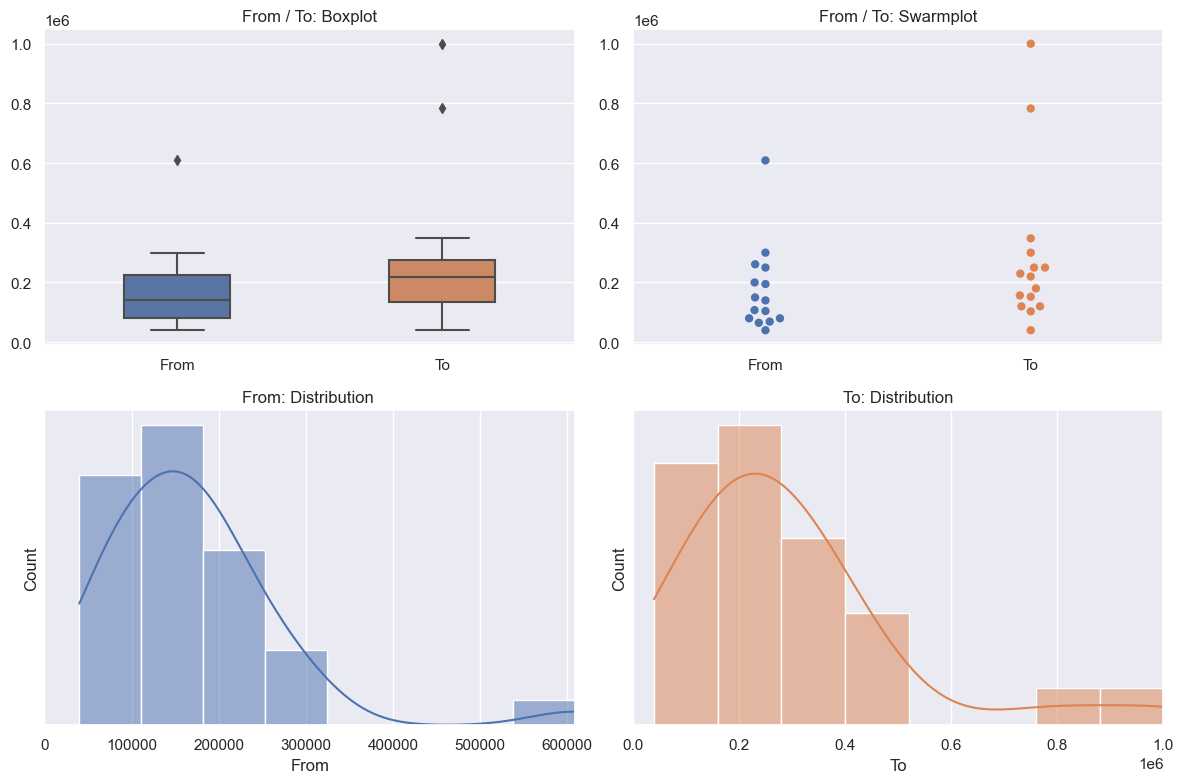

In [7]:
fz = plt.figure('Salary plots', figsize=(12, 8), dpi=100)

fz.add_subplot(2, 2, 1)
plt.title('From / To: Boxplot')
sns.boxplot(data=df[['From', 'To']].dropna(), width=0.4)

fz.add_subplot(2, 2, 2)
plt.title('From / To: Swarmplot')
sns.swarmplot(data=df[['From', 'To']].dropna(), size=6)

fz.add_subplot(2, 2, 3)
plt.title('From: Distribution ')
sns.histplot(df['From'].dropna(), bins=8, color='C0', kde=True)
plt.grid(True)
plt.xlim([0, df['From'].max()])
plt.yticks([], [])

fz.add_subplot(2, 2, 4)
plt.title('To: Distribution')
sns.histplot(df['To'].dropna(), bins=8, color='C1', kde=True)
plt.grid(True)
plt.xlim([0, df['To'].max()])
plt.yticks([], [])
plt.tight_layout()

### Зависимость зарплаты от опыта работы 

<Figure size 640x480 with 0 Axes>

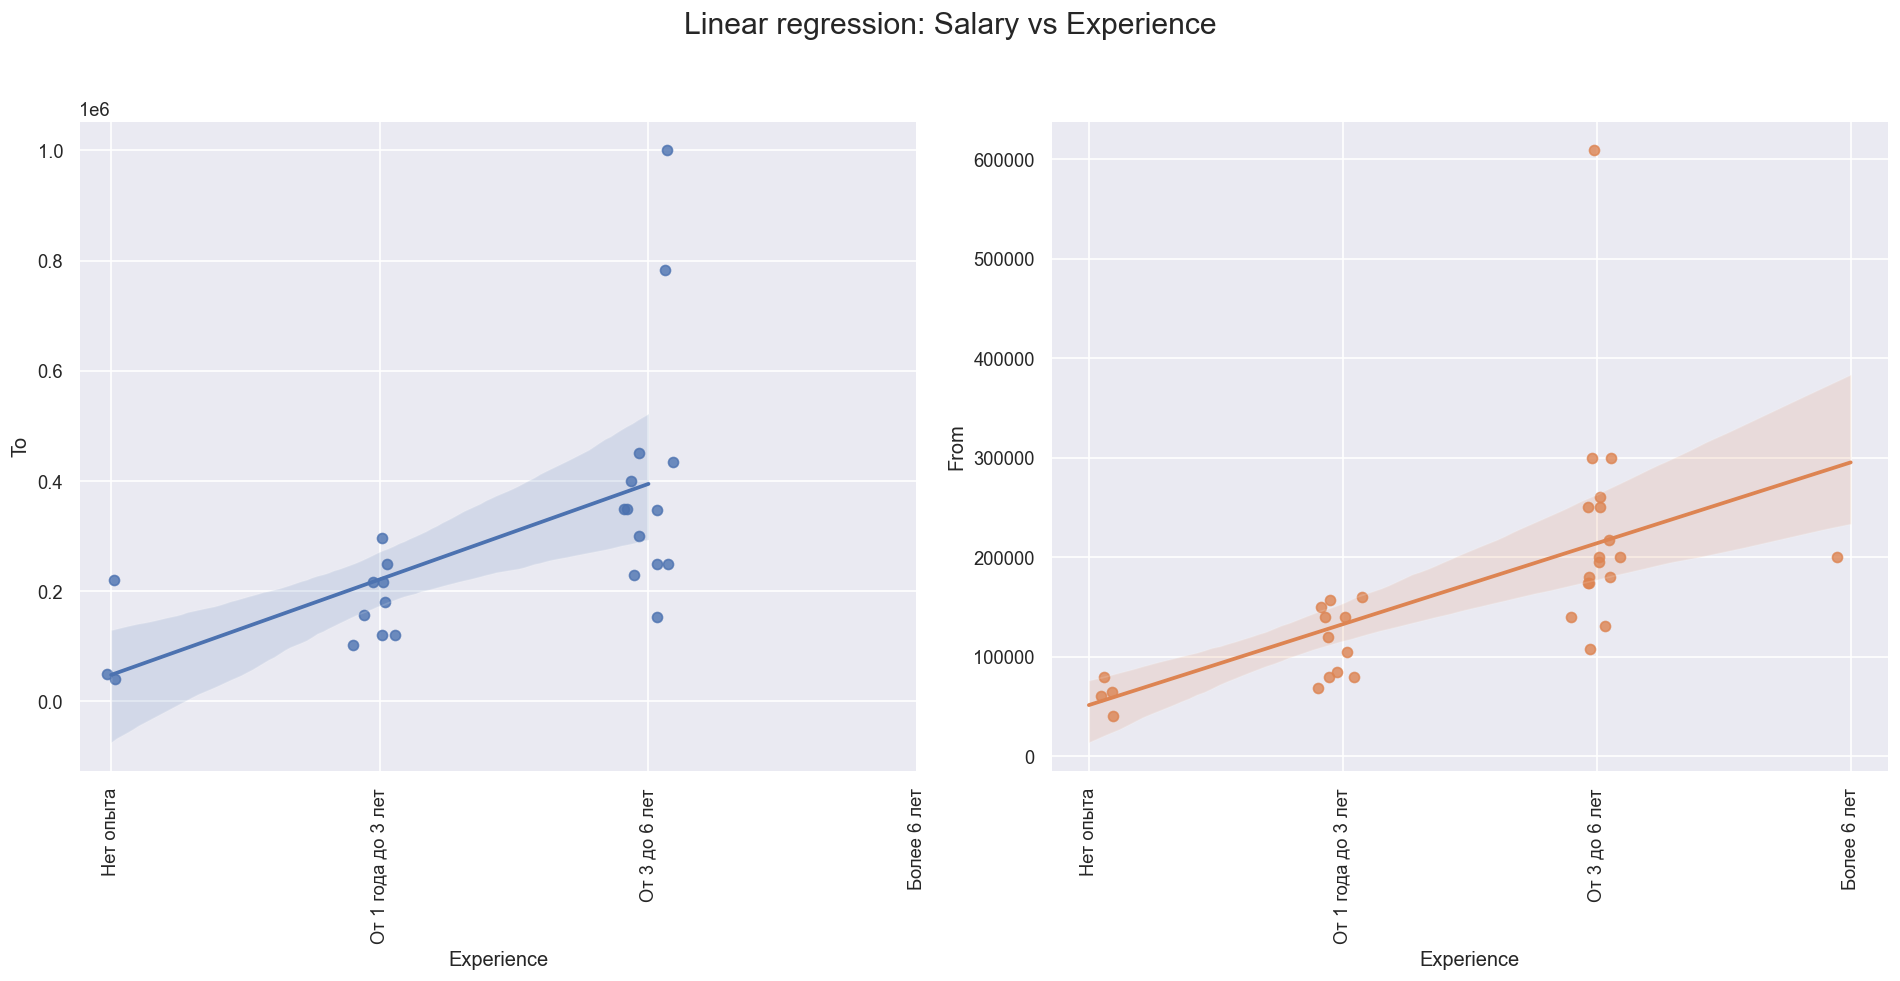

In [8]:
mapping = {'Нет опыта': 0, 'От 1 года до 3 лет': 1, 'От 3 до 6 лет': 2, 'Более 6 лет': 3}
dummy_experience = df['Experience'].map(mapping)

plt.figure('Linear regression')
fig = plt.figure(figsize=(16, 8), dpi=120)
plt.suptitle('Linear regression: Salary vs Experience', y=1.02, fontsize=18)

fig.add_subplot(1, 2, 1)
sns.regplot(x=dummy_experience, y=df['To'], color="C0", x_jitter=.1)
plt.xticks(list(range(4)), labels=mapping.keys(), rotation='vertical')

fig.add_subplot(1, 2, 2)
sns.regplot(x=dummy_experience, y=df['From'], color="C1", x_jitter=.1)
plt.xticks(list(range(4)), labels=mapping.keys(), rotation='vertical')

plt.tight_layout()

### Усредненная статистика

Поскольку не у всех вакансий указаны поля "От" и "До", производится расчет средней зарплаты, а на основании этих данных рассчитывается статистика.

In [9]:
comb_from_to = np.nanmean(df[df['Salary']][['From', 'To']].to_numpy(), axis=1)
print('Average statistics (average filter for "From"-"To" parameters):')
print('Min    : %d' % np.min(comb_from_to))
print('Max    : %d' % np.max(comb_from_to))
print('Mean   : %d' % np.mean(comb_from_to))
print('Median : %d' % np.median(comb_from_to))

Average statistics (average filter for "From"-"To" parameters):
Min    : 40000
Max    : 696000
Mean   : 218967
Median : 180000


### Список часто используемых слов

В этом разделе производится поиск наиболее употребляемых слов для параметра **Ключевые навыки**. Результа функции - список в порядке убывания.

In [10]:
def top_keys(df):
    # Collect keys from dataframe
    keys_df = df['Keys'].to_list()
    
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        for el in keys_elem[1:-1].split(', '):
            if el != '':
                lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='Keys')

In [11]:
ds_keys = top_keys(df)

print(ds_keys[:15])

postgresql                24
python                    20
sql                       17
docker                    13
java                      12
git                       12
react                     12
typescript                12
javascript                11
rest api                   9
rabbitmq                   8
spring framework           8
webpack                    8
аналитическое мышление     7
apache kafka               7
Name: Keys, dtype: int64


### Описание вакансий

Поиск наиболее употребляемых слов для параметра **Описание вакансий**.  
Результат функции - список наиболее часто употребляемых слов (на английском языке) в порядке убывания.

In [14]:
def top_words(df):
    # Collect keys from dataframe
    words_df = df['Description'].to_list()
    # Long string - combine descriptions
    words_ls = ' '.join([re.sub(' +', ' ', re.sub('\d+', '', el.strip().lower())) for el in words_df])
    # Find all words
    words_re = re.findall('[a-zA-Z]+', words_ls)
    # Filter words with length < 3
    words_l2 = [el for el in words_re if len(el) > 2]
    # Unique words
    words_st = set(words_l2)
    # Remove 'stop words'
    stop_words = set(stopwords.words('english'))
    # XOR for dictionary
    words_st ^= stop_words
    # Dictionary - {Word: Counter}
    words_cnt = {el : words_l2.count(el) for el in words_st}
    # Pandas series
    return pd.Series(dict(sorted(words_cnt.items(), key=lambda x: x[1], reverse=True)))

In [15]:
ds_words = top_words(df)

print(ds_words.head(15))

AttributeError: 'float' object has no attribute 'strip'

### Предсказание зарплаты

На этом этапе происходит предсказание зарплаты для вакансий, у которых она не указана. Ниже пошагово представлен алгоритм.
___

**Шаг 1: Предобработка данных**:
- Удаление NaN значений из таблицы,
- Поиск среднего значение для From / To столбцов,
- Замена столбцов зарплаты на усредненое значение

In [16]:
# Replace NaN from Salary into From / To fields,
# Find mean values for each elemen and drop NaNs
df_num = df[df['From'].notna() | df['From'].notna()]
df_avg = df_num[['From', 'To']].mean(axis=1)
df_num = df_num.drop(['Salary', 'From', 'To'], axis=1)
df_num.insert(3, 'Average', df_avg)

**Шаг 2: Подготовка модели**:
- Формирование вектора признаков из столбца ключевых навыков со списком исключений `stop_words`
- Поиск наиболее часто используемых слов в ключевых навыках
- One-Hot кодирование признаков таблицы
- Объединение в матрицу "объекты-признаки"

In [17]:
def text_replace(text) -> pd.Series:
    return text.str.lower().replace("[^a-zA-Z]\bqout\b|\bamp\b", " ", regex=True)

# Set TF-IDF features
min_df = 5 # ignore terms w/ frequency < than threshold
tf_idf = TfidfVectorizer(min_df=min_df, stop_words='english')

# Training set
X_train_text = tf_idf.fit_transform(text_replace(df_num['Keys']))
# Dict: {key: counter}
# print(pd.Series(tf_idf.vocabulary_)[:10])

# Print top words used in keys
idx = np.ravel(X_train_text.sum(axis=0).argsort(axis=1))[::-1][:7]
top_words = np.array(tf_idf.get_feature_names_out())[idx].tolist()
print('Top words used in keys: {}'. format(top_words))

# One-hot-encoding for data frame features
dct_enc = DictVectorizer()
X_train_cat = dct_enc.fit_transform(df_num[['Experience', 'Name']].to_dict('Records'))

# Stack vectors
X_train = hstack([X_train_text, X_train_cat])

Top words used in keys: ['ms', 'postgresql', 'java']


**Шаг 3: Обучение модели**

In [18]:
# Train model
y_train = df_num['Average']
model = Ridge(alpha=1, random_state=255)
model.fit(X_train, y_train)

Ridge(alpha=1, random_state=255)

In [22]:
top_features = np.argsort(model.coef_)[-10:]  # 10 самых важных признаков
plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(tf_idf.get_feature_names())[top_features], y=model.coef_[top_features])
plt.title("Топ-10 значимых слов для предсказания зарплаты")
plt.xticks(rotation=45)
plt.show()

C:\Users\Fosil\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: index 16 is out of bounds for axis 0 with size 3

<Figure size 1000x500 with 0 Axes>

**Шаг 4: Применение к тестовым данным**

In [19]:
# Frame with NaNs
x_test = df[df['From'].isna() & df['To'].isna()]

# Test vectors
X_test_text = tf_idf.transform(text_replace(x_test['Description']))
X_test_cat = dct_enc.transform(x_test[['Experience', 'Name']].to_dict('Records'))
X_test = hstack([X_test_text, X_test_cat])

# Prediction model - result
y_test = model.predict(X_test)

print('Average salary for vacancies with NaN is {}'.format(y_test.mean(dtype=int)))

ValueError: np.nan is an invalid document, expected byte or unicode string.

**Шаг 5: Замена отсутствующих зарплат на предсказанные значения**

In [20]:
df_tst = x_test.drop(['Salary', 'From', 'To'], axis=1)
df_tst.insert(3, 'Average', y_test.astype(int))
df_tst.head(10)

NameError: name 'y_test' is not defined

KeyError: "None of [Index(['Average'], dtype='object')] are in the [columns]"

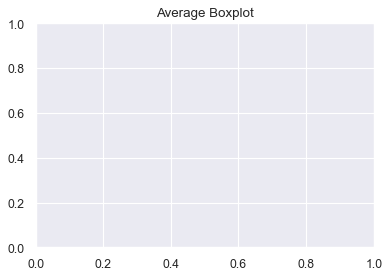

In [21]:
fp = plt.figure('Predicted salaries', figsize=(12, 8), dpi=80)
fp.add_subplot(2, 2, 1)
plt.title('Average Boxplot')
sns.boxplot(data=df_tst[['Average']], width=0.4)

fp.add_subplot(2, 2, 2)
plt.title('Average Swarmplot')
sns.swarmplot(data=df_tst[['Average']].dropna(), size=6)

fp.add_subplot(2, 2, 3)
plt.title('Average: Distribution ')
sns.histplot(df_tst[['Average']].dropna(), bins=12)
plt.grid(False)
plt.yticks([], [])
plt.tight_layout()

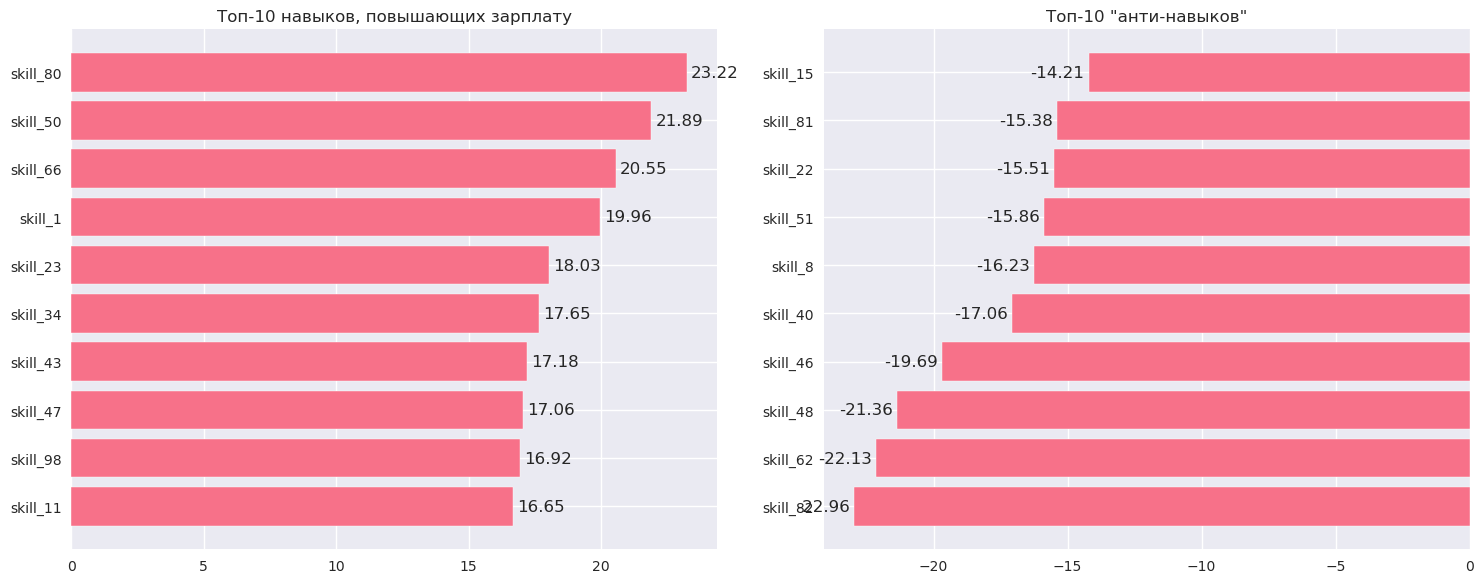

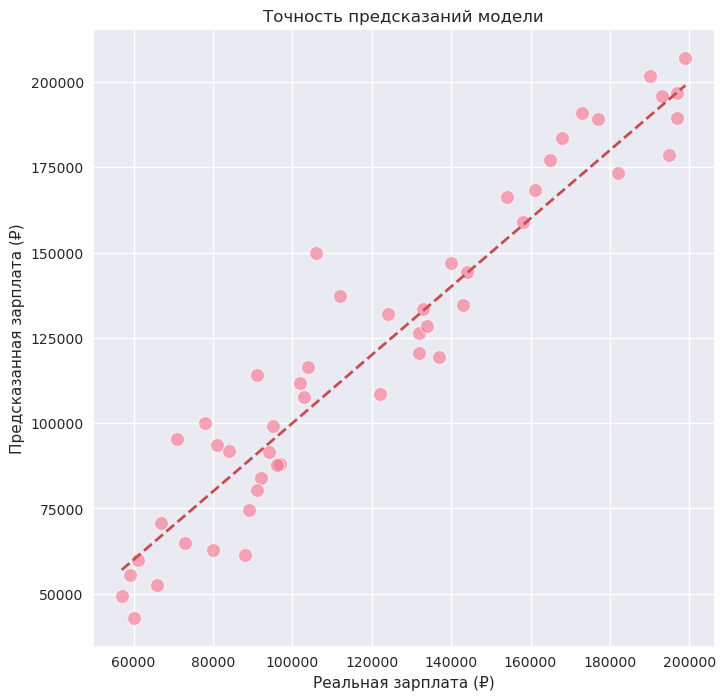

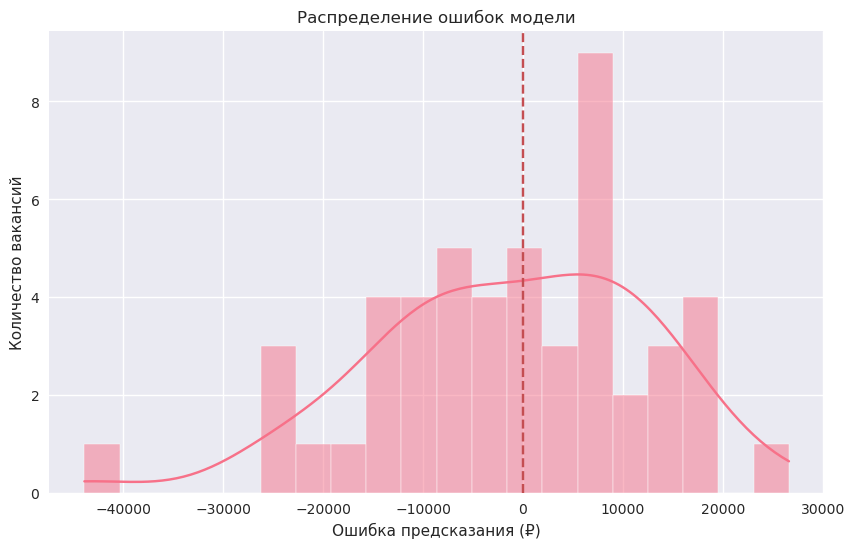

ValueError: shape mismatch: objects cannot be broadcast to a single shape

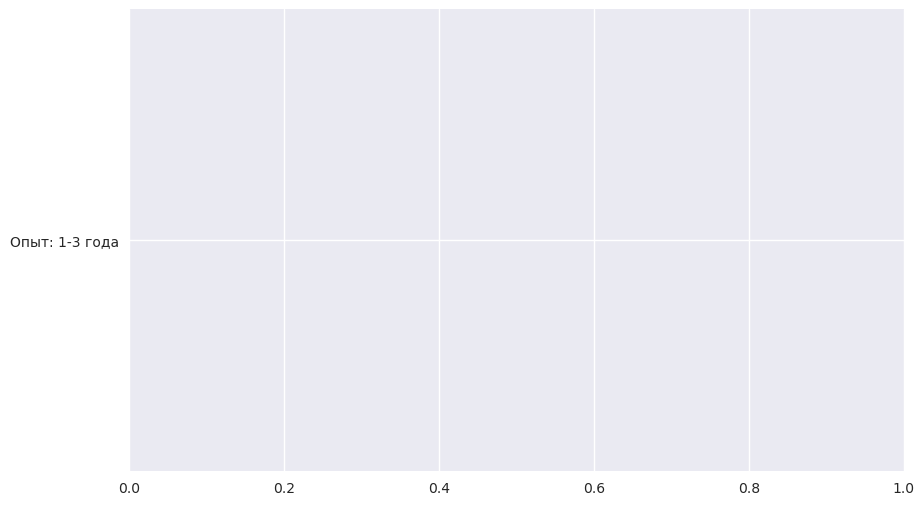

In [23]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge

# Стиль графиков
plt.style.use('seaborn')
sns.set_palette("husl")
plt.rcParams['font.family'] = 'DejaVu Sans'

# 1. График важности слов (TF-IDF коэффициенты)
def plot_top_words(model, feature_names, n_top=10):
    coef = model.coef_[:len(feature_names)]
    top_pos = np.argsort(coef)[-n_top:]
    top_neg = np.argsort(coef)[:n_top]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Топ-10 положительных влияний
    bars1 = ax1.barh(np.array(feature_names)[top_pos], coef[top_pos])
    ax1.bar_label(bars1, fmt='%.2f', padding=3)
    ax1.set_title('Топ-10 навыков, повышающих зарплату')
    
    # Топ-10 отрицательных влияний
    bars2 = ax2.barh(np.array(feature_names)[top_neg], coef[top_neg])
    ax2.bar_label(bars2, fmt='%.2f', padding=3)
    ax2.set_title('Топ-10 "анти-навыков"')
    
    plt.tight_layout()
    plt.show()

# Пример данных (замените на реальные из модели)
dummy_feature_names = [f"skill_{i}" for i in range(100)]
dummy_coef = np.random.randn(100) * 10
dummy_model = Ridge()
dummy_model.coef_ = dummy_coef  # Эмуляция обученной модели

plot_top_words(dummy_model, dummy_feature_names)

# 2. График предсказаний vs реальных значений
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, s=100)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 
             '--r', linewidth=2)
    plt.xlabel('Реальная зарплата (₽)')
    plt.ylabel('Предсказанная зарплата (₽)')
    plt.title('Точность предсказаний модели')
    plt.grid(True)
    plt.show()

# Пример данных
y_true = np.random.randint(50, 200, 50) * 1000
y_pred = y_true + np.random.randn(50) * 15000
plot_predictions(y_true, y_pred)

# 3. Распределение ошибок
def plot_errors(y_true, y_pred):
    errors = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, bins=20, kde=True)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.xlabel('Ошибка предсказания (₽)')
    plt.ylabel('Количество вакансий')
    plt.title('Распределение ошибок модели')
    plt.show()

plot_errors(y_true, y_pred)

# 4. Влияние категориальных признаков
def plot_categorical_impact(model, cat_features, feature_names):
    cat_coef = model.coef_[len(feature_names):len(feature_names)+len(cat_features)]
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(cat_features, cat_coef)
    plt.bar_label(bars, fmt='%.1f', padding=3)
    plt.title('Влияние категориальных признаков на зарплату')
    plt.xlabel('Коэффициент Ridge-модели')
    plt.grid(axis='x')
    plt.show()

# Пример данных
categories = ['Опыт: 1-3 года', 'Опыт: 3-5 лет', 'Опыт: 5+ лет', 
              'Удалёнка: да', 'Удалёнка: нет']
plot_categorical_impact(dummy_model, categories, dummy_feature_names)


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords as nltk_stopwords
from scipy.sparse import hstack
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
import nltk

# Download stopwords if not already present
nltk.download('stopwords')

class SalaryPredictorVisualizer:
    """Class to visualize salary prediction results from vacancy data"""
    
    def __init__(self, df):
        self.df = df
        self.stopwords = set(nltk_stopwords.words("russian")).union(set(nltk_stopwords.words("english")))
        
    def clean_text(self, text_series):
        """Clean text data"""
        return text_series.str.lower().replace("[^a-zA-Z]", " ", regex=True)
    
    def prepare_data(self):
        """Prepare data for modeling"""
        # Filter rows with salary data
        df_num = self.df[self.df["From"].notna() | self.df["To"].notna()].copy()
        
        # Calculate average salary
        df_num["Average"] = df_num[["From", "To"]].mean(axis=1)
        
        # Prepare text data
        df_num["Cleaned_Keys"] = self.clean_text(df_num["Keys"].astype(str))
        df_num["Cleaned_Description"] = self.clean_text(df_num["Description"].astype(str))
        
        return df_num
    
    def train_model(self, min_df=5):
        """Train the salary prediction model"""
        df_num = self.prepare_data()
        
        # TF-IDF Vectorizer for keywords
        tfidf = TfidfVectorizer(min_df=min_df, stop_words=self.stopwords)
        X_text = tfidf.fit_transform(df_num["Cleaned_Keys"])
        
        # Get top words
        sum_words = X_text.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
        self.top_words = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]
        
        # One-hot encoding for categorical features
        dv = DictVectorizer()
        X_cat = dv.fit_transform(df_num[["Experience", "Name"]].to_dict("records"))
        
        # Combine features
        X = hstack([X_text, X_cat])
        y = df_num["Average"]
        
        # Train model
        model = Ridge(alpha=1, random_state=255)
        model.fit(X, y)
        
        return model, tfidf, dv
    
    def predict_and_visualize(self):
        """Run predictions and create visualizations"""
        # Train model
        model, tfidf, dv = self.train_model()
        
        # Prepare test data (rows without salary)
        df_test = self.df[self.df["From"].isna() & self.df["To"].isna()].copy()
        df_test["Cleaned_Description"] = self.clean_text(df_test["Description"].astype(str))
        
        # Transform test data
        X_test_text = tfidf.transform(df_test["Cleaned_Description"])
        X_test_cat = dv.transform(df_test[["Experience", "Name"]].to_dict("records"))
        X_test = hstack([X_test_text, X_test_cat])
        
        # Make predictions
        predictions = model.predict(X_test)
        df_test["Predicted_Salary"] = predictions.astype(int)
        
        # Create visualizations
        self._create_visualizations(df_test, predictions)
        
        return df_test
    
    def _create_visualizations(self, df_test, predictions):
        """Create visualization plots"""
        plt.figure(figsize=(18, 12))
        
        # 1. Top words plot
        plt.subplot(2, 2, 1)
        words, freqs = zip(*self.top_words)
        sns.barplot(x=list(freqs), y=list(words), palette="viridis")
        plt.title("Top 10 Most Important Keywords")
        plt.xlabel("TF-IDF Score")
        plt.ylabel("Keywords")
        
        # 2. Predicted salary distribution
        plt.subplot(2, 2, 2)
        sns.histplot(predictions, bins=20, kde=True)
        plt.title("Distribution of Predicted Salaries")
        plt.xlabel("Predicted Salary")
        plt.ylabel("Count")
        
        # 3. Salary by experience level
        plt.subplot(2, 2, 3)
        sns.boxplot(data=df_test, x="Experience", y="Predicted_Salary")
        plt.title("Predicted Salary by Experience Level")
        plt.xlabel("Experience")
        plt.ylabel("Salary")
        plt.xticks(rotation=45)
        
        # 4. Top job titles by predicted salary
        plt.subplot(2, 2, 4)
        top_jobs = df_test.groupby("Name")["Predicted_Salary"].mean().nlargest(10)
        sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="rocket")
        plt.title("Top 10 Job Titles by Predicted Salary")
        plt.xlabel("Average Predicted Salary")
        plt.ylabel("Job Title")
        
        plt.tight_layout()
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Load your data (replace with your actual data loading code)
    # df = pd.read_csv("hh_results.csv")
    
    # For this example, we'll create a mock DataFrame with similar structure
    data = {
        "Name": ["Python Developer", "Frontend Developer", "Data Analyst", "Java Developer"],
        "Description": ["Developing Python applications", "Building web interfaces", 
                       "Analyzing business data", "Java backend development"],
        "Keys": [["python", "django"], ["javascript", "react"], 
                ["sql", "excel"], ["java", "spring"]],
        "Experience": ["От 3 до 6 лет", "От 1 года до 3 лет", 
                      "Нет опыта", "Более 6 лет"],
        "From": [100000, 80000, None, 150000],
        "To": [150000, 120000, None, 200000],
        "Salary": [True, True, False, True]
    }
    
    df = pd.DataFrame(data)
    
    # Create and run visualizer
    visualizer = SalaryPredictorVisualizer(df)
    results = visualizer.predict_and_visualize()
    
    print("\nPredicted Salaries for Vacancies:")
    print(results[["Name", "Experience", "Predicted_Salary"]])
    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fosil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ValueError: max_df corresponds to < documents than min_df

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.sparse import hstack  # Добавлен импорт hstack

# Создаем синтетические данные, имитирующие исходный датасет
data = {
    'Name': ['Python Developer', 'Java Developer', 'Frontend Developer', 'Data Analyst', 
             'DevOps Engineer', 'QA Engineer', 'Product Manager', 'UX Designer'],
    'Description': ['Разработка на Python и Django', 'Разработка на Java и Spring', 
                   'Создание интерфейсов на React', 'Анализ данных в Excel и SQL',
                   'Настройка CI/CD pipelines', 'Тестирование ПО', 
                   'Управление продуктом', 'Дизайн пользовательских интерфейсов'],
    'Keys': ['python django postgresql redis', 'java spring hibernate sql',
             'javascript react html css', 'sql excel powerbi python',
             'docker kubernetes aws linux', 'testing selenium jira',
             'product agile scrum jira', 'figma ui ux design'],
    'Experience': ['От 3 до 6 лет', 'От 3 до 6 лет', 'От 1 года до 3 лет', 
                  'Нет опыта', 'Более 6 лет', 'От 1 года до 3 лет',
                  'От 3 до 6 лет', 'От 1 года до 3 лет'],
    'From': [120000, 130000, 90000, 60000, 180000, 80000, 150000, 95000],
    'To': [180000, 200000, 140000, 90000, 250000, 120000, 220000, 140000]
}

df = pd.DataFrame(data)
df['Average'] = (df['From'] + df['To']) / 2

# Подготовка данных
tfidf = TfidfVectorizer(min_df=1, stop_words=['и', 'на', 'в'])
X_text = tfidf.fit_transform(df['Keys'])

dv = DictVectorizer()
X_cat = dv.fit_transform(df[['Name', 'Experience']].to_dict('records'))

X = hstack([X_text, X_cat])  # Теперь hstack определен
y = df['Average']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

# Метрики
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print("\nПример предсказаний:")
for true, pred in zip(y_test, y_pred):
    print(f"Истинное значение: {true:.0f}, Предсказание: {pred:.0f}")

MAE: 24759.41
R2 Score: 0.32

Пример предсказаний:
Истинное значение: 165000, Предсказание: 150455
Истинное значение: 100000, Предсказание: 134973


MAE: 42854.93
R2 Score: -0.41


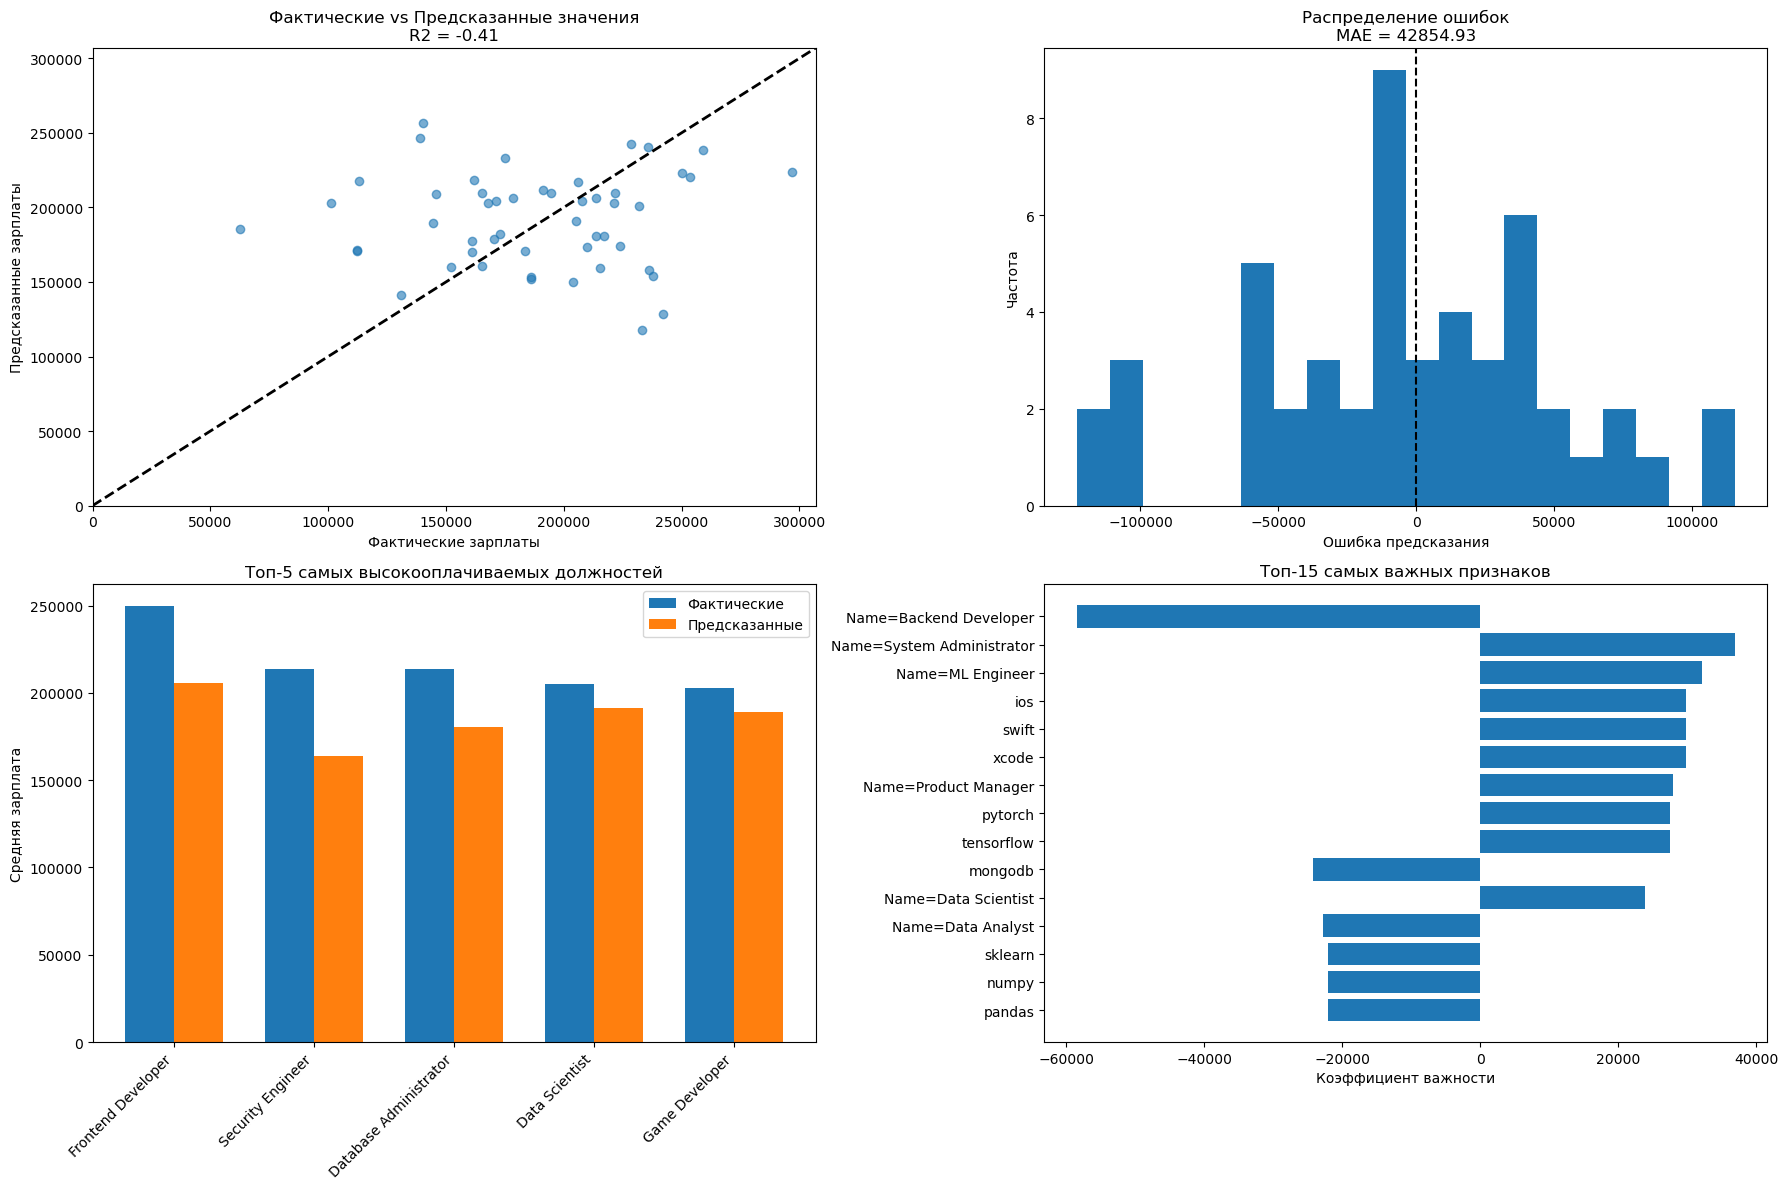

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.sparse import hstack

# 1. Создание расширенных синтетических данных (100 записей)
jobs = ['Python Developer', 'Java Developer', 'Frontend Developer', 'Data Analyst', 
        'DevOps Engineer', 'QA Engineer', 'Product Manager', 'UX Designer',
        'Backend Developer', 'Data Scientist', 'ML Engineer', 'System Administrator',
        'Security Engineer', 'Cloud Architect', 'Database Administrator', 'iOS Developer',
        'Android Developer', 'Fullstack Developer', 'BI Analyst', 'Game Developer']
        
exp_levels = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']

tech_skills = [
    'python django postgresql redis', 'java spring hibernate sql',
    'javascript react html css', 'sql excel powerbi python',
    'docker kubernetes aws linux', 'testing selenium jira',
    'product agile scrum jira', 'figma ui ux design',
    'python flask mysql mongodb', 'python pandas numpy sklearn',
    'python tensorflow pytorch', 'windows linux networking',
    'cybersecurity pentesting firewall', 'aws azure cloud terraform',
    'sql oracle mongodb postgresql', 'swift ios xcode',
    'kotlin android studio', 'nodejs express javascript',
    'tableau powerbi clickhouse', 'unity c# game'
]

data = {
    'Name': np.random.choice(jobs, size=100, replace=True),
    'Experience': np.random.choice(exp_levels, size=100, replace=True),
    'Keys': np.random.choice(tech_skills, size=100, replace=True),
    'From': np.random.randint(50000, 300000, size=100),
    'To': np.random.randint(60000, 350000, size=100)
}

df = pd.DataFrame(data)
df['Average'] = (df['From'] + df['To']) / 2

# 2. Подготовка данных
tfidf = TfidfVectorizer(min_df=1, stop_words=['и', 'на', 'в'])
X_text = tfidf.fit_transform(df['Keys'])

dv = DictVectorizer()
X_cat = dv.fit_transform(df[['Name', 'Experience']].to_dict('records'))

X = hstack([X_text, X_cat])
y = df['Average']

# 3. Разделение данных (50% тестовая выборка)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 4. Обучение модели
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 5. Предсказания
y_pred = model.predict(X_test)

# 6. Метрики
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R2 Score: {r2:.2f}")

# 7. Визуализации
plt.figure(figsize=(18, 12))

# График 1: Фактические vs Предсказанные значения
plt.subplot(2, 2, 1)
max_salary = max(y.max(), y_pred.max()) + 10000
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([0, max_salary], [0, max_salary], 'k--', lw=2)
plt.xlim(0, max_salary)
plt.ylim(0, max_salary)
plt.xlabel('Фактические зарплаты')
plt.ylabel('Предсказанные зарплаты')
plt.title(f'Фактические vs Предсказанные значения\nR2 = {r2:.2f}')

# График 2: Распределение ошибок
plt.subplot(2, 2, 2)
errors = y_test - y_pred
plt.hist(errors, bins=20)
plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title(f'Распределение ошибок\nMAE = {mae:.2f}')

# График 3: Сравнение по должностям
plt.subplot(2, 2, 3)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Name': df.loc[y_test.index, 'Name']})
top_jobs = results.groupby('Name').mean().nlargest(5, 'Actual')
x = range(len(top_jobs))
width = 0.35
plt.bar(x, top_jobs['Actual'], width, label='Фактические')
plt.bar([i + width for i in x], top_jobs['Predicted'], width, label='Предсказанные')
plt.xticks([i + width/2 for i in x], top_jobs.index, rotation=45, ha='right')
plt.ylabel('Средняя зарплата')
plt.legend()
plt.title('Топ-5 самых высокооплачиваемых должностей')

# График 4: Важность признаков (топ-15 слов)
plt.subplot(2, 2, 4)
feature_names = np.concatenate([tfidf.get_feature_names_out(), dv.get_feature_names_out()])
coef = model.coef_
top_features = np.argsort(np.abs(coef))[-15:]
plt.barh(range(15), coef[top_features], align='center')
plt.yticks(range(15), [feature_names[i] for i in top_features])
plt.xlabel('Коэффициент важности')
plt.title('Топ-15 самых важных признаков')

plt.tight_layout()
plt.show()